# Arewa Data Science Academy
## Deep Learning Cohort2.0
**Name: Zaharaddeen Nura Ibrahim**

**Email: zaharaddeennura@gmail.com**

**Title: Week 4 Solution**

In [4]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [5]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


2.5.1+cu124


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

Computer vision is widely applied across various industries. Here are three key areas:

1. Healthcare: Utilized for analyzing medical images to detect conditions like tumors or fractures, enhancing diagnostic accuracy. VISO.AI

2. Manufacturing: Employed in automated inspection systems to identify product defects on assembly lines, improving quality control. WIKIPEDIA

3. Autonomous Vehicles: Enables self-driving cars to interpret their surroundings, recognizing objects and navigating safely. ARXIV

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting in machine learning occurs when a model learns not only the underlying patterns in the training data but also the noise, leading to excellent performance on training data but poor generalization to new, unseen data. For example, in a regression task, fitting a high-degree polynomial to data that follows a simple trend can cause the model to capture random fluctuations rather than the true relationship, resulting in overfitting. WIKIPEDIA

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

To prevent overfitting in machine learning, consider the following techniques:

1. Cross-Validation: Splitting your dataset into multiple folds and training the model on different subsets helps ensure it generalizes well to unseen data. GEEKSFORGEEKS

2. Regularization: Adding a penalty to the loss function discourages the model from becoming overly complex, promoting simpler models that generalize better. WIKIPEDIA

3. Early Stopping: Monitoring the model's performance on a validation set and halting training when performance starts to degrade prevents the model from overfitting the training data. ARXIV

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

Convolutional Neural Networks (CNNs). The platform provides a visual representation of how CNNs process images through various layers, including convolutional, activation, and pooling layers.By uploading a custom image, the tool demonstrates how each layer transforms the input, highlighting features detected at different stages. For instance, initial layers may identify basic edges, while deeper layers recognize complex patterns. This step-by-step visualization clarifies the inner workings of CNNs and their application in image classification tasks.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [10]:
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

In [11]:
# Setup training data
train_data = datasets.MNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.MNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 53.5MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.69MB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.5MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.95MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [12]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [13]:
len(train_data), len(test_data)

(60000, 10000)

In [14]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [15]:
# What's the shape of the image?
image.shape

torch.Size([1, 28, 28])

In [16]:
# How many samples are there?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [17]:
# See classes
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


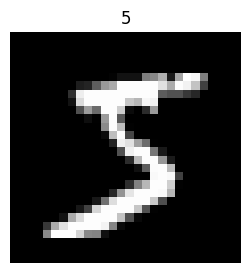

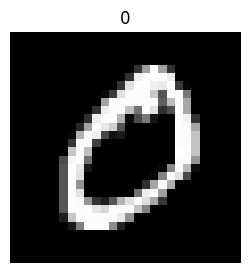

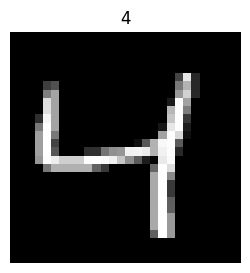

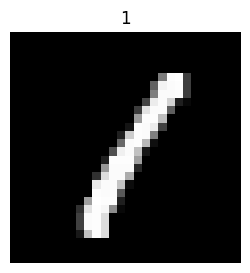

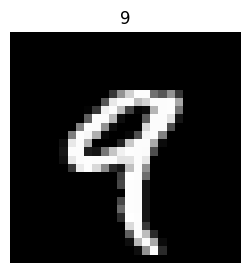

In [18]:
import matplotlib.pyplot as plt
for i in range(5):
  img = train_data[i][0]
  print(img.shape)
  img_squeeze = img.squeeze()
  print(img_squeeze.shape)
  label = train_data[i][1]
  plt.figure(figsize=(3, 3))
  plt.imshow(img_squeeze, cmap="gray")
  plt.title(label)
  plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [19]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)


In [20]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7bd13d250f50>,
 <torch.utils.data.dataloader.DataLoader at 0x7bd1454f71d0>)

In [21]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [22]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [23]:
# Create a convolutional neural network
class MNISTModel_0(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x



In [24]:
device

'cpu'

In [25]:
model_0 = MNISTModel_0(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_0

MNISTModel_0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [26]:
%%time
from tqdm.auto import tqdm

# Train on CPU
model_cpu = MNISTModel_0(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to("cpu")

# Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

### Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    model_cpu.train()

    # Put data on CPU
    X, y = X.to("cpu"), y.to("cpu")

    # Forward pass
    y_pred = model_cpu(X)

    # Loss calculation
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Step the optimizer
    optimizer.step()

  # Adjust train loss for number of batches
  train_loss /= len(train_dataloader)

  ### Testing loop
  test_loss_total = 0

  # Put model in eval mode
  model_cpu.eval()

  # Turn on inference mode
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      # Make sure test data on CPU
      X_test, y_test = X_test.to("cpu"), y_test.to("cpu")
      test_pred = model_cpu(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss_total += test_loss

    test_loss_total /= len(test_dataloader)

  # Print out what's happening
  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.241 | Test loss: 0.060
Epoch: 1 | Loss: 0.071 | Test loss: 0.052
Epoch: 2 | Loss: 0.055 | Test loss: 0.045
Epoch: 3 | Loss: 0.046 | Test loss: 0.039
Epoch: 4 | Loss: 0.041 | Test loss: 0.042
CPU times: user 4min 45s, sys: 1.09 s, total: 4min 46s
Wall time: 4min 50s


In [27]:
%%time
from tqdm.auto import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

# Train on GPU
model_gpu = MNISTModel_0(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to(device)

# Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_gpu.parameters(), lr=0.1)

# Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  model_gpu.train()
  for batch, (X, y) in enumerate(train_dataloader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_pred = model_gpu(X)

    # Loss calculation
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Step the optimizer
    optimizer.step()

  # Adjust train loss to number of batches
  train_loss /= len(train_dataloader)

  ### Testing loop
  test_loss_total = 0
  # Put model in eval mode and turn on inference mode
  model_gpu.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      # Make sure test data on target device
      X_test, y_test = X_test.to(device), y_test.to(device)

      test_pred = model_gpu(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss_total += test_loss

    # Adjust test loss total for number of batches
    test_loss_total /= len(test_dataloader)

  # Print out what's happening
  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.364 | Test loss: 0.069
Epoch: 1 | Loss: 0.072 | Test loss: 0.057
Epoch: 2 | Loss: 0.056 | Test loss: 0.048
Epoch: 3 | Loss: 0.047 | Test loss: 0.049
Epoch: 4 | Loss: 0.043 | Test loss: 0.037
CPU times: user 4min 44s, sys: 444 ms, total: 4min 44s
Wall time: 4min 45s


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

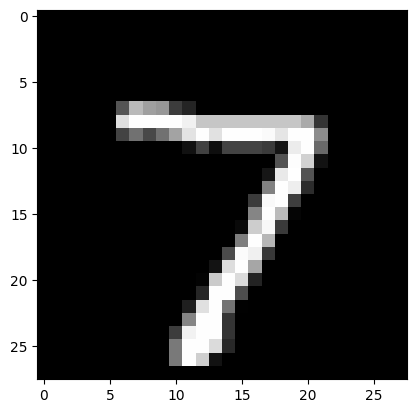

In [28]:
# Make predictions with the trained model
plt.imshow(test_data[0][0].squeeze(), cmap="gray")

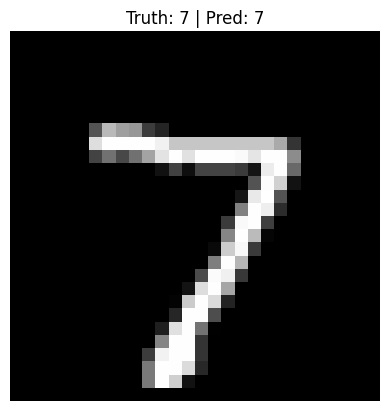

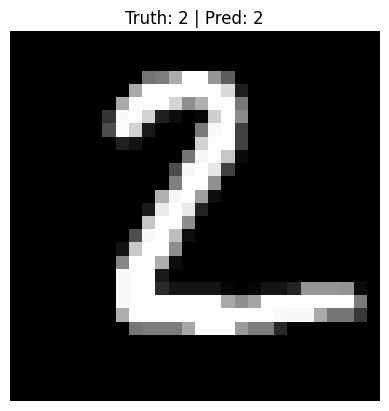

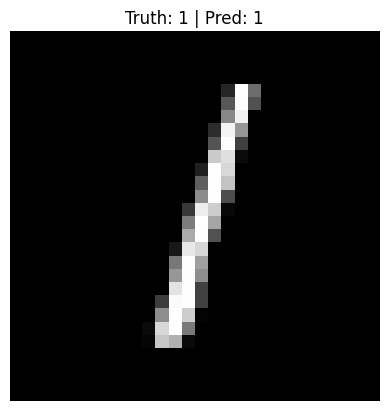

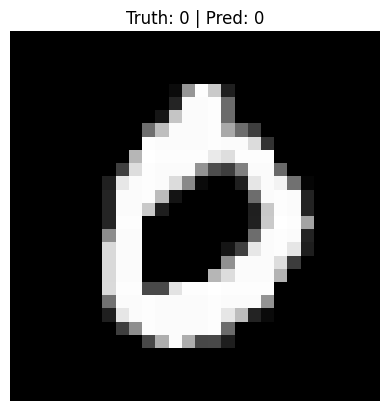

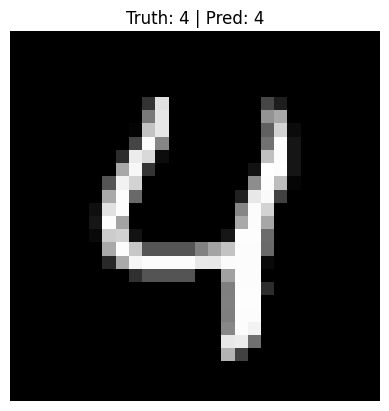

In [29]:
num_to_plot = 5
for i in range(num_to_plot):
  # Get image and labels from the test data
  img = test_data[i][0]
  label = test_data[i][1]

  # Make prediction on image
  model_pred_logits = model_gpu(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  # Plot the image and prediction
  plt.figure()
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [30]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.7 MB/s eta 0:00:00
mlxtend version: 0.23.4


In [31]:
# Import mlxtend upgraded version
#import mlxtend
#print(mlxtend.__version__)
#assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

In [32]:
# # Import tqdm for progress bar
# from tqdm.auto import tqdm

# # 1. Make predictions with trained model
# y_preds = []
# model_0.eval()
# with torch.inference_mode():
#   for X, y in tqdm(test_dataloader, desc="Making predictions"):
#     # Send data and targets to target device
#     X, y = X.to(device), y.to(device)
#     # Do the forward pass
#     y_logit = model_0(X)
#     # Turn predictions from logits -> prediction probabilities -> predictions labels
#     y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
#     # Put predictions on CPU for evaluation
#     y_preds.append(y_pred.cpu())
# # Concatenate list of predictions into a tensor
# y_pred_tensor = torch.cat(y_preds)

In [33]:
#test_data.targets[:10], y_preds[:10]

In [34]:
# from torchmetrics import ConfusionMatrix
# from mlxtend.plotting import plot_confusion_matrix

# # 2. Setup confusion matrix instance and compare predictions to targets
# confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
# confmat_tensor = confmat(preds=y_pred_tensor,
#                          target=test_data.targets)

# # 3. Plot the confusion matrix
# fig, ax = plot_confusion_matrix(
#     conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
#     class_names=class_names, # turn the row and column labels into class names
#     figsize=(10, 7)
# );

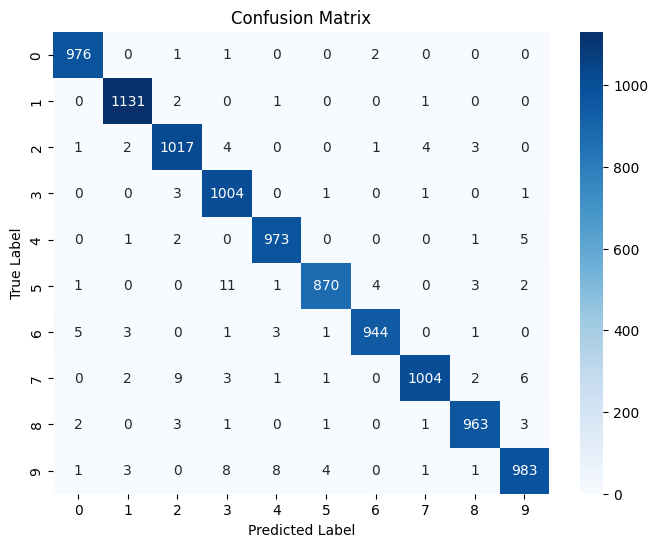

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Put model in evaluation mode
model_gpu.eval()

# Collect all predictions and true labels
all_preds = []
all_labels = []

with torch.inference_mode():
    for X_batch, y_batch in test_dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        y_pred_logits = model_gpu(X_batch)
        y_pred_labels = torch.argmax(y_pred_logits, dim=1)

        all_preds.extend(y_pred_labels.cpu().numpy())  # Move to CPU & convert to numpy
        all_labels.extend(y_batch.cpu().numpy())

# Compute confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [36]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape


torch.Size([1, 3, 64, 64])

In [37]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=3,
                       stride=2,
                       padding=1)

print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 32, 32])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [38]:
# Download FashionMNIST train & test
from torchvision import datasets
from torchvision import transforms

fashion_mnist_train = datasets.FashionMNIST(root=".",
                                            download=True,
                                            train=True,
                                            transform=transforms.ToTensor())

fashion_mnist_test = datasets.FashionMNIST(root=".",
                                           train=False,
                                           download=True,
                                           transform=transforms.ToTensor())

len(fashion_mnist_train), len(fashion_mnist_test)

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.4MB/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 312kB/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.47MB/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 15.1MB/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



(60000, 10000)

In [39]:
# Get the class names of the Fashion MNIST dataset
fashion_mnist_class_names = fashion_mnist_train.classes
fashion_mnist_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [40]:
# Turn FashionMNIST datasets into dataloaders
from torch.utils.data import DataLoader

fashion_mnist_train_dataloader = DataLoader(fashion_mnist_train,
                                            batch_size=32,
                                            shuffle=True)

fashion_mnist_test_dataloader = DataLoader(fashion_mnist_test,
                                           batch_size=32,
                                           shuffle=False)

len(fashion_mnist_train_dataloader), len(fashion_mnist_test_dataloader)

(1875, 313)

In [41]:
# model_1 is the same architecture as MNIST_model
model_1 = MNISTModel_0(input_shape=1,
                      hidden_units=10,
                      output_shape=10).to(device)
model_1


MNISTModel_0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [42]:
# Setup loss and optimizer
from torch import nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)


In [43]:
# Setup metrics
from tqdm.auto import tqdm
from torchmetrics import Accuracy

acc_fn = Accuracy(task = 'multiclass', num_classes=len(fashion_mnist_class_names)).to(device)

# Setup training/testing loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss, test_loss_total = 0, 0
  train_acc, test_acc = 0, 0

  ### Training
  model_1.train()
  for batch, (X_train, y_train) in enumerate(fashion_mnist_train_dataloader):
    X_train, y_train = X_train.to(device), y_train.to(device)

    # Forward pass and loss
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, y_train)
    train_loss += loss
    train_acc += acc_fn(y_pred, y_train)

    # Backprop and gradient descent
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # Adjust the loss/acc (find the loss/acc per epoch)
  train_loss /= len(fashion_mnist_train_dataloader)
  train_acc /= len(fashion_mnist_train_dataloader)

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(fashion_mnist_test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)

      # Forward pass and loss
      y_pred_test = model_1(X_test)
      test_loss = loss_fn(y_pred_test, y_test)
      test_loss_total += test_loss

      test_acc += acc_fn(y_pred_test, y_test)

    # Adjust the loss/acc (find the loss/acc per epoch)
    test_loss /= len(fashion_mnist_test_dataloader)
    test_acc /= len(fashion_mnist_test_dataloader)

  # Print out what's happening
  print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Train acc: {train_acc:.2f} | Test loss: {test_loss_total:.3f} | Test acc: {test_acc:.2f}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.180 | Train acc: 0.57 | Test loss: 190.056 | Test acc: 0.78
Epoch: 1 | Train loss: 0.525 | Train acc: 0.81 | Test loss: 151.172 | Test acc: 0.83
Epoch: 2 | Train loss: 0.442 | Train acc: 0.84 | Test loss: 137.276 | Test acc: 0.85
Epoch: 3 | Train loss: 0.402 | Train acc: 0.86 | Test loss: 132.444 | Test acc: 0.85
Epoch: 4 | Train loss: 0.373 | Train acc: 0.87 | Test loss: 119.624 | Test acc: 0.86


In [44]:
# Make predictions with trained model_2
test_preds = []
model_1.eval()
with torch.inference_mode():
  for X_test, y_test in tqdm(fashion_mnist_test_dataloader):
    y_logits = model_1(X_test.to(device))
    y_pred_probs = torch.softmax(y_logits, dim=1)
    y_pred_labels = torch.argmax(y_pred_probs, dim=1)
    test_preds.append(y_pred_labels)
test_preds = torch.cat(test_preds).cpu() # matplotlib likes CPU
test_preds[:10], len(test_preds)

  0%|          | 0/313 [00:00<?, ?it/s]

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), 10000)

In [45]:
# Get wrong prediction indexes
import numpy as np
wrong_pred_indexes = np.where(test_preds != fashion_mnist_test.targets)[0]
len(wrong_pred_indexes)

1365

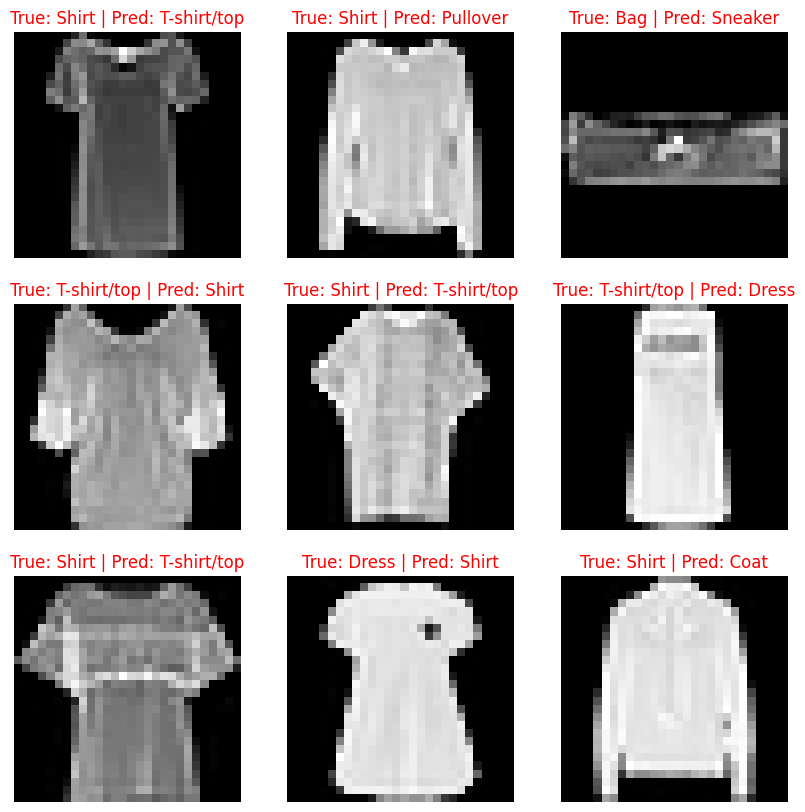

In [46]:
# Select random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
  # Get true and pred labels
  true_label = fashion_mnist_class_names[fashion_mnist_test[idx][1]]
  pred_label = fashion_mnist_class_names[test_preds[idx]]

  # Plot the wrong prediction with its original label
  plt.subplot(3, 3, i+1)
  plt.imshow(fashion_mnist_test[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False);